In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

c:\Users\admin\Desktop\traffic\Traffic-Sign-Detector\yolov5


Cloning into 'yolov5'...
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ------------------------------ -------- 81.9/104.6 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 104.6/104.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/207.6 kB ? eta -:--:--
   ----------- ---------------------------- 61.4/207.6 kB 1.7 MB/s eta 0:00:01
   ----------------------- ---------------- 122.9/207.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  204.8/207.6 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 207.6/207.6 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.1 MB 1.6 MB/s eta 0:00:06
    --------------------------------------- 0.1/8.1 MB 1.7 MB/s eta 0:00:05
   -

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python312\\Scripts\\cpuinfo.exe' -> 'C:\\Python312\\Scripts\\cpuinfo.exe.deleteme'


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [3]:
!cp /content/drive/MyDrive/yolo_training/traffic_signs_yolov52/weights/best.pt .


'cp' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
from google.colab import files
uploaded = files.upload()
import os
image_path = next(iter(uploaded))
print(f"Uploaded image: {image_path}")

# 5. Run detection on the uploaded image
!python detect.py --weights best.pt --img 416 --conf 0.25 --source {image_path}

# 6. Display the result
from IPython.display import Image, display
output_path = os.path.join('runs/detect', os.listdir('runs/detect')[-1], image_path)
display(Image(filename=output_path))

ModuleNotFoundError: No module named 'google'

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0


In [30]:
import zipfile

with zipfile.ZipFile("gtsrb-german-traffic-sign.zip", 'r') as zip_ref:
    # List all files in the ZIP
    all_files = zip_ref.namelist()

    # Filter files that are inside the Test/ directory
    test_files = [f for f in all_files if f.startswith("Test/")]

    # Extract only those
    for file in test_files:
        zip_ref.extract(file, "/content/dataset")

FileNotFoundError: [Errno 2] No such file or directory: 'gtsrb-german-traffic-sign.zip'

In [ ]:
!mv /content/dataset/Test /content/yolov5/test_images


In [ ]:
import os
import shutil

src_dir = '/content/yolov5/test_images'  # Folder with all test images
tmp_dir = '/content/yolov5/test_images_20'

os.makedirs(tmp_dir, exist_ok=True)

# Copy first 20 image files (filtering common image formats)
image_files = [f for f in os.listdir(src_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.ppm'))]
image_files = sorted(image_files)[:20]

for file in image_files:
    shutil.copy(os.path.join(src_dir, file), tmp_dir)


In [20]:
%cd /content/yolov5
!python detect.py --weights best.pt --img 416 --conf 0.25 --source test_images_20 --save-txt --save-conf


/content/yolov5
detect: weights=['best.pt'], source=test_images_20, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7126096 parameters, 0 gradients, 16.1 GFLOPs
image 1/20 /content/yolov5/test_images_20/00000.png: 416x416 1 Vehicles over 3.5 metric tons prohibited, 230.4ms
image 2/20 /content/yolov5/test_images_20/00001.png: 416x416 1 Speed limit (30km/h), 221.8ms
image 3/20 /content/yolov5/test_images_20/00002.png: 416x384 1 Keep right, 190.3ms
image 4/20 /content/yolov5/test_images_20/00003.png: 416x416 1 

In [ ]:
!ls /content/yolov5/runs/detect/exp


00000.png  00003.png  00006.png  00009.png  00012.png  00015.png  00018.png
00001.png  00004.png  00007.png  00010.png  00013.png  00016.png  00019.png
00002.png  00005.png  00008.png  00011.png  00014.png  00017.png  labels


In [26]:
data_yaml_content = """
names:
  - Speed limit (20km/h)
  - Speed limit (30km/h)
  - Speed limit (50km/h)
  - Speed limit (60km/h)
  - Speed limit (70km/h)
  - Speed limit (80km/h)
  - End of speed limit (80km/h)
  - Speed limit (100km/h)
  - Speed limit (120km/h)
  - No passing
  - No passing for vehicles over 3.5 metric tons
  - Right-of-way at the next intersection
  - Priority road
  - Yield
  - Stop
  - No vehicles
  - Vehicles over 3.5 metric tons prohibited
  - No entry
  - General caution
  - Dangerous curve to the left
  - Dangerous curve to the right
  - Double curve
  - Bumpy road
  - Slippery road
  - Road narrows on the right
  - Road work
  - Traffic signals
  - Pedestrians
  - Children crossing
  - Bicycles crossing
  - Beware of ice/snow
  - Wild animals crossing
  - End of all speed and passing limits
  - Turn right ahead
  - Turn left ahead
  - Ahead only
  - Go straight or right
  - Go straight or left
  - Keep right
  - Keep left
  - Roundabout mandatory
  - End of no passing
  - End of no passing by vehicles over 3.5 metric tons
"""

with open("/content/yolov5/data.yaml", "w") as f:
    f.write(data_yaml_content)


Showing: /content/yolov5/test_images_20/00007.png


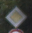

Detected Labels:
Class 12: Priority road
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00010.png


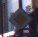

Detected Labels:
Class 12: Priority road
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00009.png


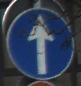

Detected Labels:
Class 35: Ahead only
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00013.png


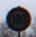

Detected Labels:
Class 7: Speed limit (100km/h)
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00014.png


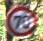

Detected Labels:
Class 4: Speed limit (70km/h)
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00004.png


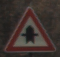

Detected Labels:
Class 11: Right-of-way at the next intersection
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00008.png


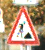

Detected Labels:
Class 25: Road work
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00012.png


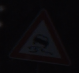

Detected Labels:
Class 23: Slippery road
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00003.png


Detected Labels:
Class 34: Turn left ahead
Class 33: Turn right ahead
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00011.png


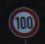

Detected Labels:
Class 7: Speed limit (100km/h)
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00016.png


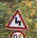

Detected Labels:
Class 21: Double curve
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00006.png


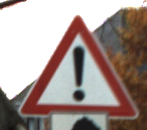

Detected Labels:
Class 18: General caution
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00015.png


Detected Labels:
Class 9: No passing
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00001.png


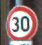

Detected Labels:
Class 1: Speed limit (30km/h)
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00018.png


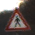

Detected Labels:
Class 27: Pedestrians
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00002.png


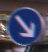

Detected Labels:
Class 38: Keep right
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00019.png


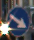

Detected Labels:
Class 38: Keep right
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00005.png


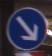

Detected Labels:
Class 38: Keep right
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00017.png


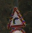

Detected Labels:
Class 20: Dangerous curve to the right
--------------------------------------------------
Showing: /content/yolov5/test_images_20/00000.png


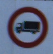

Detected Labels:
Class 16: Vehicles over 3.5 metric tons prohibited
--------------------------------------------------


In [37]:
import glob
from IPython.display import Image, display

result_images = glob.glob('/content/yolov5/test_images_20/*.png')  # Only top-level .jpgs
import yaml
label_dir = '/content/yolov5/runs/detect/exp/labels'

# Load class names from data.yaml
with open('/content/yolov5/data.yaml', 'r') as f:
    data_yaml = yaml.safe_load(f)
    class_names = data_yaml['names']

# Show image and label content with class names
for img_path in result_images:
    print(f"Showing: {img_path}")
    display(Image(filename=img_path))

    filename = os.path.basename(img_path).replace('.png', '.txt')
    label_path = os.path.join(label_dir, filename)

    if os.path.exists(label_path):
        print("Detected Labels:")
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 1:
                    class_id = int(parts[0])
                    class_name = class_names[class_id] if class_id < len(class_names) else f"Unknown({class_id})"
                    print(f"Class {class_id}: {class_name}")
    else:
        print("No label found.")
    print('-' * 50)



In [31]:
%cd ..

/content


In [33]:
from google.colab import files

# Step 1: Extract Meta/ from ZIP into /content/dataset
with zipfile.ZipFile("gtsrb-german-traffic-sign.zip", 'r') as zip_ref:
    all_files = zip_ref.namelist()
    meta_files = [f for f in all_files if f.startswith("Meta/")]
    for file in meta_files:
        zip_ref.extract(file, "/content/dataset")

# Step 2: Move Meta to yolov5 if needed
!mv /content/dataset/Meta /content/yolov5/Meta

# (Assuming Test is already moved to yolov5)

# Step 3: Zip both Meta and Test folders inside yolov5
!zip -r /content/gtsrb_subset.zip /content/yolov5/Meta /content/yolov5/test_images/

# Step 4: Download the ZIP
files.download('/content/gtsrb_subset.zip')

Streaming output truncated to the last 5000 lines.
  adding: content/yolov5/test_images/07579.png (stored 0%)
  adding: content/yolov5/test_images/10011.png (stored 0%)
  adding: content/yolov5/test_images/09907.png (stored 0%)
  adding: content/yolov5/test_images/04977.png (stored 0%)
  adding: content/yolov5/test_images/05653.png (deflated 0%)
  adding: content/yolov5/test_images/12324.png (stored 0%)
  adding: content/yolov5/test_images/11251.png (stored 0%)
  adding: content/yolov5/test_images/04624.png (deflated 0%)
  adding: content/yolov5/test_images/02841.png (stored 0%)
  adding: content/yolov5/test_images/04931.png (stored 0%)
  adding: content/yolov5/test_images/11297.png (deflated 2%)
  adding: content/yolov5/test_images/05626.png (stored 0%)
  adding: content/yolov5/test_images/06288.png (stored 0%)
  adding: content/yolov5/test_images/07503.png (stored 0%)
  adding: content/yolov5/test_images/06346.png (stored 0%)
  adding: content/yolov5/test_images/00283.png (stored 0%)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>